# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [6]:
# Let's visualize it!
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


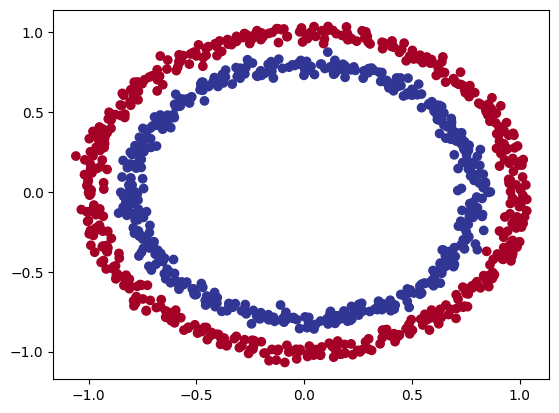

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak...

In [10]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 9ms/step - loss: 4.0824 - accuracy: 0.4710
Epoch 2/5
32/32 [==============================] - 0s 10ms/step - loss: 2.1695 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7414 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7074 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6989 - accuracy: 0.4920


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=10, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within the layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 2.6704 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7313 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7078 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6944 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6940 - accuracy: 0.4330
Epoch 11

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 8ms/step - loss: 0.6997 - accuracy: 0.5080


[0.6996809840202332, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this functions will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions accros the meshgrids
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we are going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We habe to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classification


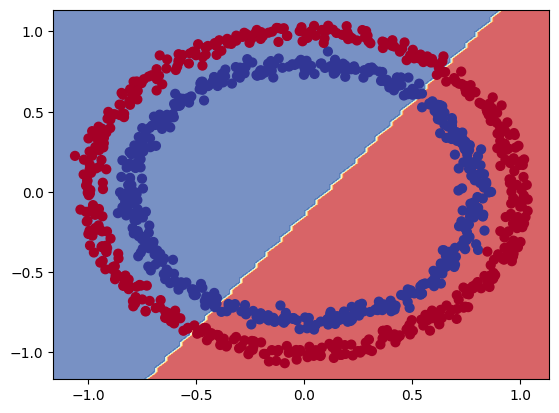

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create somre regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Oh wait... we comipled our model for a binary classification problem.

But... er are now working on a regression problem, let's change the model to suit our data.

In [19]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 396.5400 - mae: 396.5400
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 294.9324 - mae: 294.9324
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 196.9843 - mae: 196.9843
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 94.9241 - mae: 94.9241
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 52.3479 - mae: 52.3479
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 77.9939 - mae: 77.9939
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 63.0976 - mae: 63.0976
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 43.0893 - mae: 43.0893
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 48.8398 - mae: 48.8398
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 42.1689 - mae: 42.1689
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 3ms/step


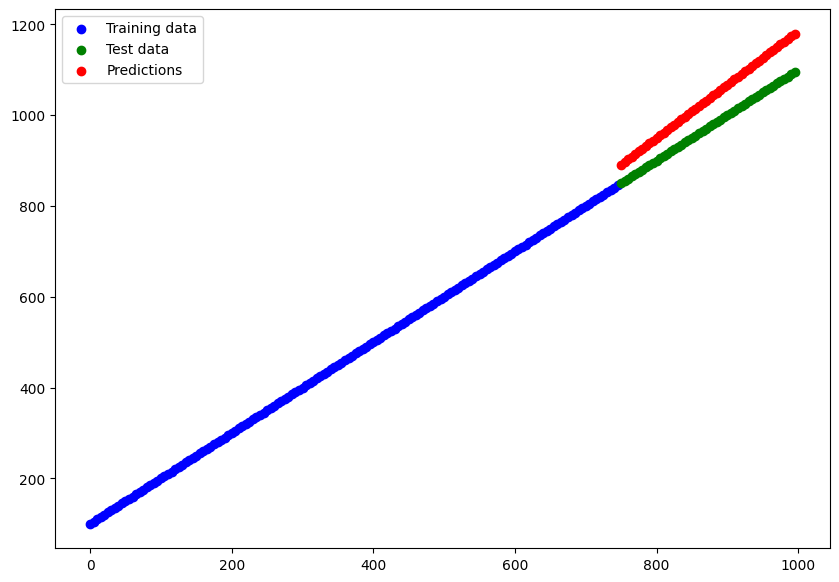

In [20]:
# Make predictinos with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()
plt.show()

## The missing piece: Non-linearity

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


c:\Users\Usuario\anaconda3\envs\tf2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 9ms/step - loss: 6.3808 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 6.3551 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 6.3504 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 6.3489 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 6.3480 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 6.3472 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 6.3285 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 6.2943 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 6.2895 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 6.2792 - accuracy: 0.4840
Epoch 11/100
32/32 [=

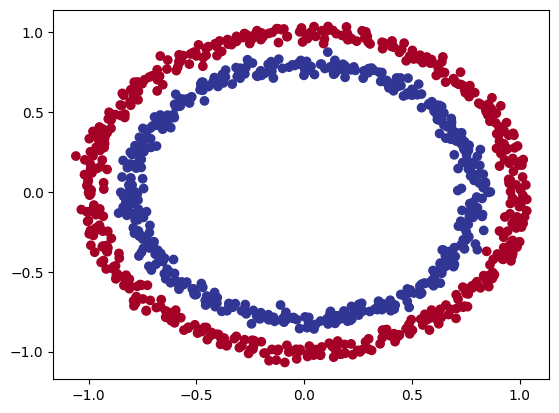

In [22]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary classification


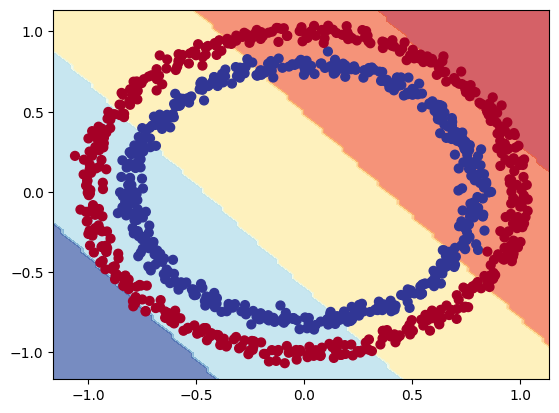

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X, y)

Let's try build our first neural network with a non-linear activation function.

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 5.7843 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 5.7328 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 5.6918 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 5.6659 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 5.6387 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 5.6062 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 5.5669 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 5.5350 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 5.4936 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 5.4985 - accuracy: 0.4800
Epoch 11

In [25]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 8ms/step - loss: 0.8975 - accuracy: 0.3110
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.8467 - accuracy: 0.2880
Epoch 3/200
32/32 [==============================] - 0s 8ms/step - loss: 0.8274 - accuracy: 0.2850
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 0.8161 - accuracy: 0.2570
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.8078 - accuracy: 0.2290
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 0.8001 - accuracy: 0.2190
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7934 - accuracy: 0.2490
Epoch 8/200
32/32 [==============================] - 0s 7ms/step - loss: 0.7874 - accuracy: 0.2380
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7813 - accuracy: 0.2190
Epoch 10/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7757 - accuracy: 0.2010
Epoch 11/

In [26]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9690


[0.09972669929265976, 0.968999981880188]

313/313 [==============================] - 1s 4ms/step
doing binary classification


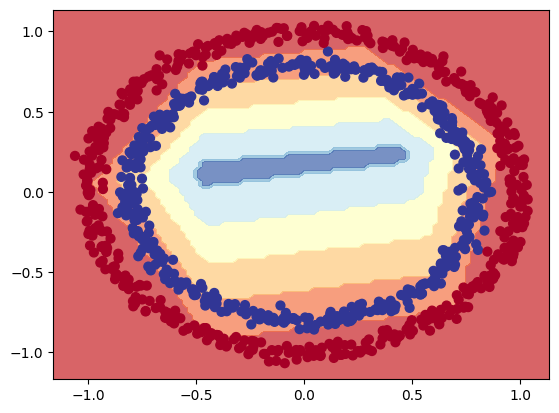

In [27]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 12ms/step - loss: 0.7001 - accuracy: 0.4940
Epoch 2/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6986 - accuracy: 0.4800
Epoch 3/200
32/32 [==============================] - 0s 10ms/step - loss: 0.6975 - accuracy: 0.4960
Epoch 4/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.4910
Epoch 5/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6961 - accuracy: 0.4930
Epoch 6/200
32/32 [==============================] - 0s 10ms/step - loss: 0.6956 - accuracy: 0.4870
Epoch 7/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6950 - accuracy: 0.4820
Epoch 8/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.4830
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4800
Epoch 10/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4880
Epoch 

313/313 [==============================] - 1s 2ms/step
doing binary classification


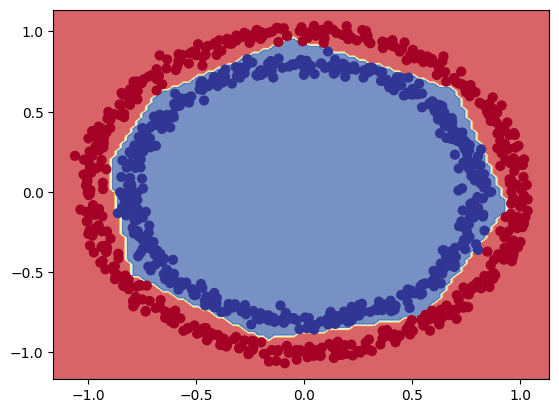

In [29]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** What's wrong the predictions we have made? Are we really evaluating our model correctly?

**Note:** The combination of **linear (straight line) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we have discussed yhe concept of linear and non-linear functions (or lines), let's see them in action.

In [30]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

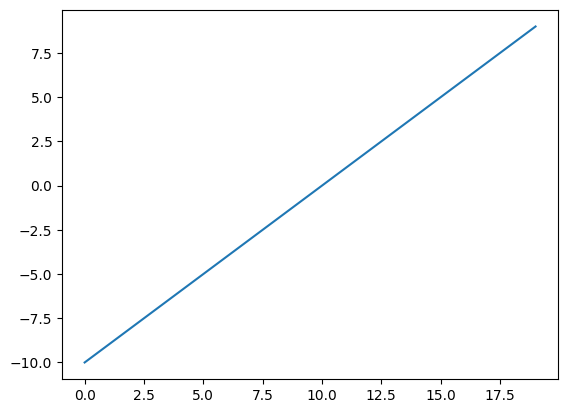

In [31]:
# Visualize our toy tensor
plt.plot(A);

In [32]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

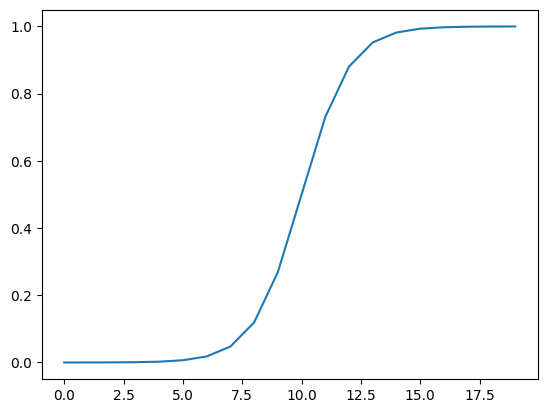

In [33]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [34]:
# Let's recreate ReLU function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

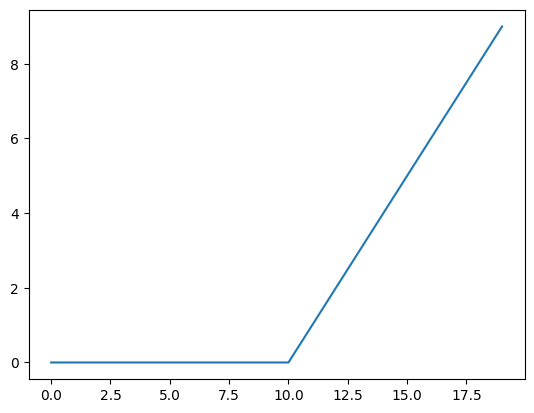

In [35]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [36]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

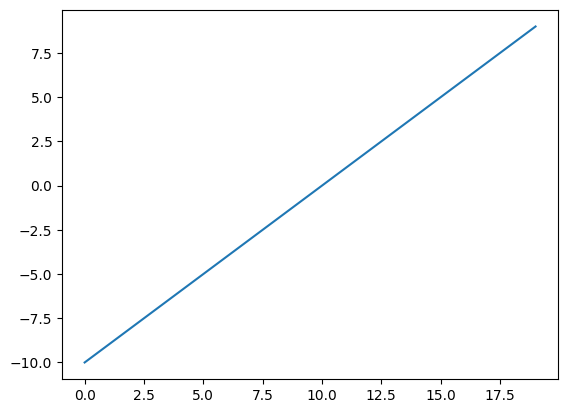

In [37]:
# Does the linear activation function change anything
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classification

So far we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [38]:
# Check how many examples we have
len(X)

1000

In [39]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [40]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [41]:
# Let's recreate a model to fit on the training data and evaluate on the test set

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 10ms/step - loss: 0.6920 - accuracy: 0.4913
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6863 - accuracy: 0.5825
Epoch 3/25
25/25 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.5600
Epoch 4/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6681 - accuracy: 0.5975
Epoch 5/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6518 - accuracy: 0.6150
Epoch 6/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6190 - accuracy: 0.7513
Epoch 7/25
25/25 [==============================] - 0s 10ms/step - loss: 0.5766 - accuracy: 0.7950
Epoch 8/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5327 - accuracy: 0.8188
Epoch 9/25
25/25 [==============================] - 0s 9ms/step - loss: 0.4805 - accuracy: 0.8363
Epoch 10/25
25/25 [==============================] - 0s 9ms/step - loss: 0.4238 - accuracy: 0.9087
Epoch 11/25
25

In [42]:
# 4. Evaluate the model on the test set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0824 - accuracy: 0.9900


[0.08244074136018753, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


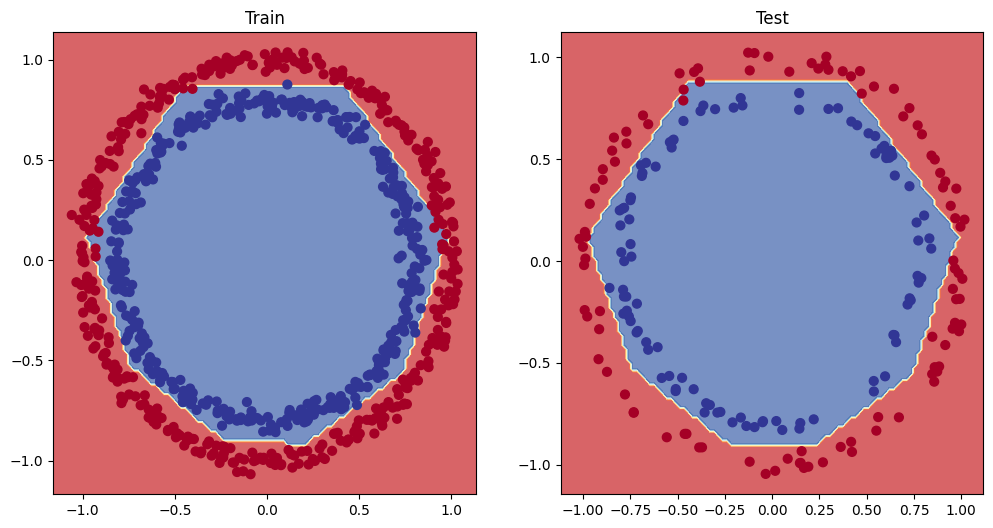

In [43]:
# Plot the decision boundaries for the training and the test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

## Plot the loss (or training) curves

In [44]:
# Convertt the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.691995,0.49125
1,0.686254,0.58250
2,0.678628,0.56000
3,0.668124,0.59750
4,0.651830,0.61500
5,0.619013,0.75125
6,0.576644,0.79500
7,0.532705,0.81875
8,0.480537,0.83625
9,0.423784,0.90875


Text(0.5, 1.0, 'Model_8 ')

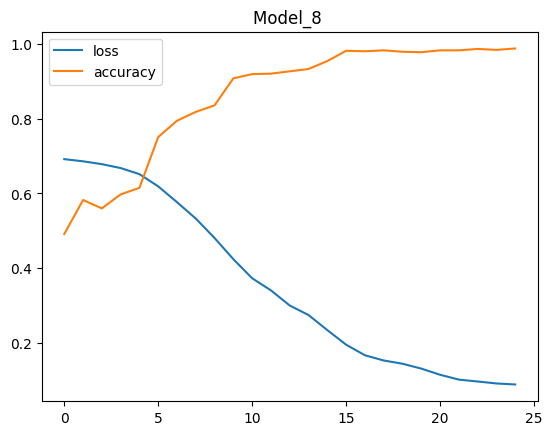

In [45]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 ")

**Note:** For many problems, the loss function going down means the model is improving.

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we are practicing building models here).
* A modified loss curves plot.

In [46]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.6892 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss:

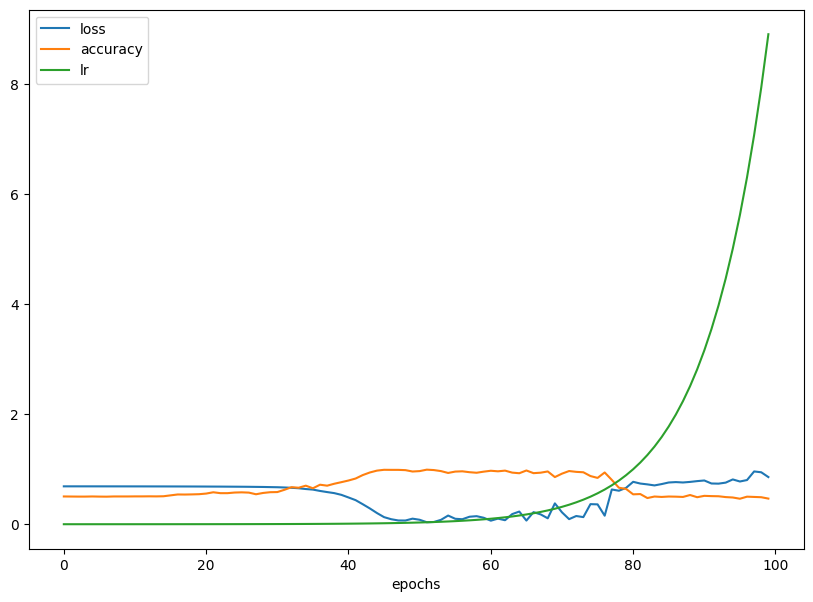

In [47]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate vs Loss')

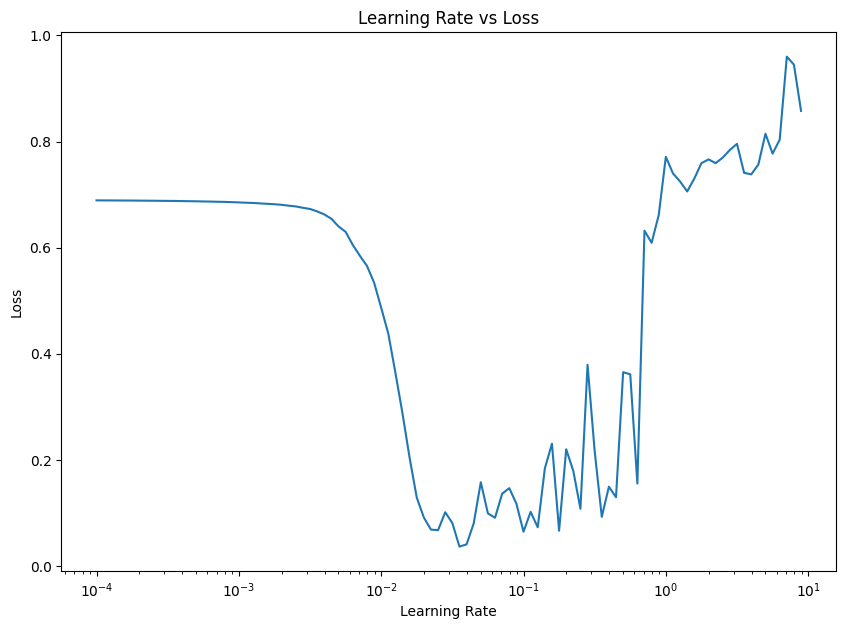

In [48]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [49]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [50]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.025),
                 metrics=['accuracy'])

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 6ms/step - loss: 0.6939 - accuracy: 0.4863
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6841 - accuracy: 0.5437
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6696 - accuracy: 0.5675
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6498 - accuracy: 0.6062
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6215 - accuracy: 0.6388
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.5726 - accuracy: 0.7200
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.5331 - accuracy: 0.7675
Epoch 8/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4719 - accuracy: 0.8075
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4373 - accuracy: 0.8225
Epoch 10/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3645 - accuracy: 0.8813
Epoch 11/20
25/2

In [51]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0754 - accuracy: 0.9850


[0.07544874399900436, 0.9850000143051147]

In [52]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.0824 - accuracy: 0.9900


[0.08244074136018753, 0.9900000095367432]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


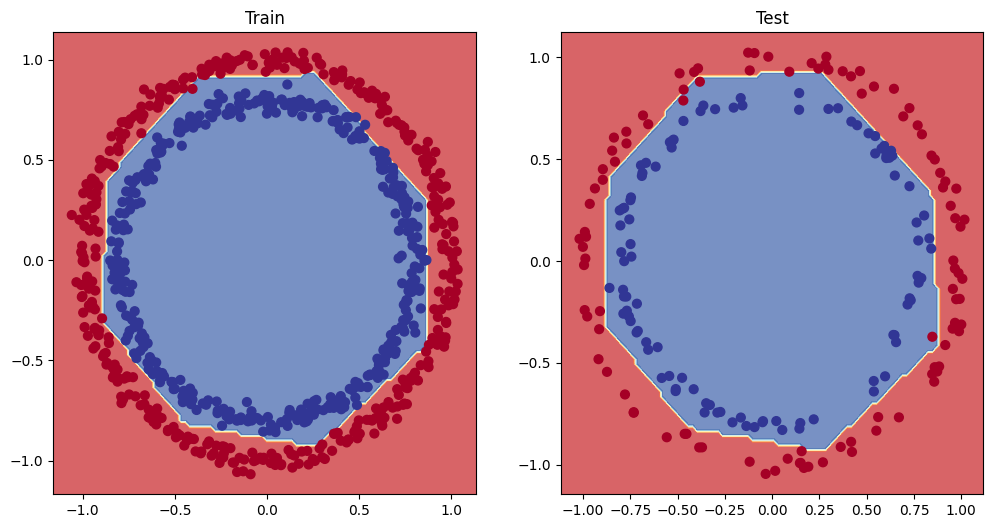

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models reults as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [54]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 7ms/step - loss: 0.0754 - accuracy: 0.9850
Model loss on the test set: 0.07544874399900436
Model accuracy on the test set: 98.50%


How about a confusion matrix?

In [55]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create our confusion matrix
try:
    confusion_matrix(y_test, y_preds)
except:
    print("We need y_preds to be binary!!")

7/7 [==============================] - 0s 2ms/step
We need y_preds to be binary!!


Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax).

In [56]:
# Convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [57]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 0, 99]], dtype=int64)

How abaout we prettify our confusion matrix?

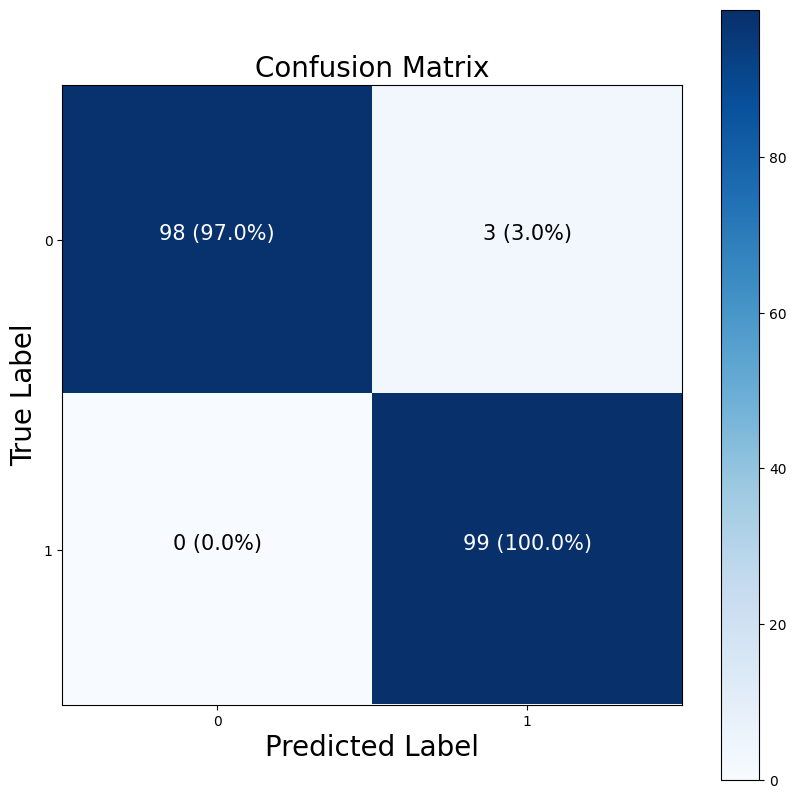

In [58]:
# Note: the confusion matrix code we are about to write is a remix of a scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it is known as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it is multi-class classification.

To practice multi-class classification we are going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist # type: ignore

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

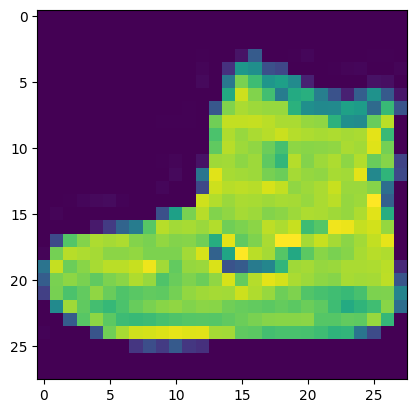

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [5]:
# Create a small list so we can index onto or training labels so they are human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

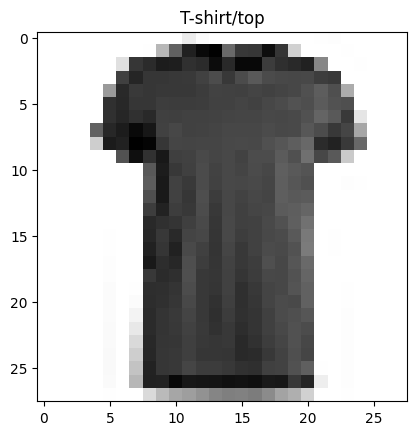

In [6]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

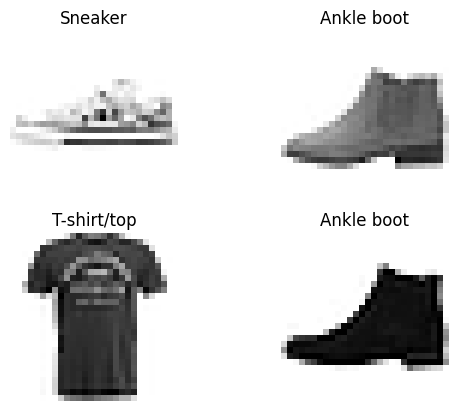

In [7]:
# Plot multiple random images of fshion MNIST
import random
plt.Figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we are going to have to tweak a few things:
* Input_shape = 28 x 28 (the shpe of one image)
* Output_shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [8]:
# our data needs to be flattened (from 28x28 to 784)
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_model.output_shape

(None, 784)

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.3934 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [10]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [12]:
# We can get out training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [13]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create the mode
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm, 
                            train_labels,
                            epochs=10, 
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5791 - accuracy: 0.3390 - val_loss: 1.3368 - val_accuracy: 0.3844
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2162 - accuracy: 0.4755 - val_loss: 1.1541 - val_accuracy: 0.5126
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0781 - accuracy: 0.5468 - val_loss: 1.0935 - val_accuracy: 0.5455
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0125 - accuracy: 0.5710 - val_loss: 1.0123 - val_accuracy: 0.5696
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9680 - accuracy: 0.5906 - val_loss: 0.9579 - val_accuracy: 0.5977
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9323 - accuracy: 0.6101 - val_loss: 0.9403 - val_accuracy: 0.6158
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9104 - accuracy: 0.6274 - val_loss: 0.9042 - val_accuracy:

**Note:** Neural Networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1).

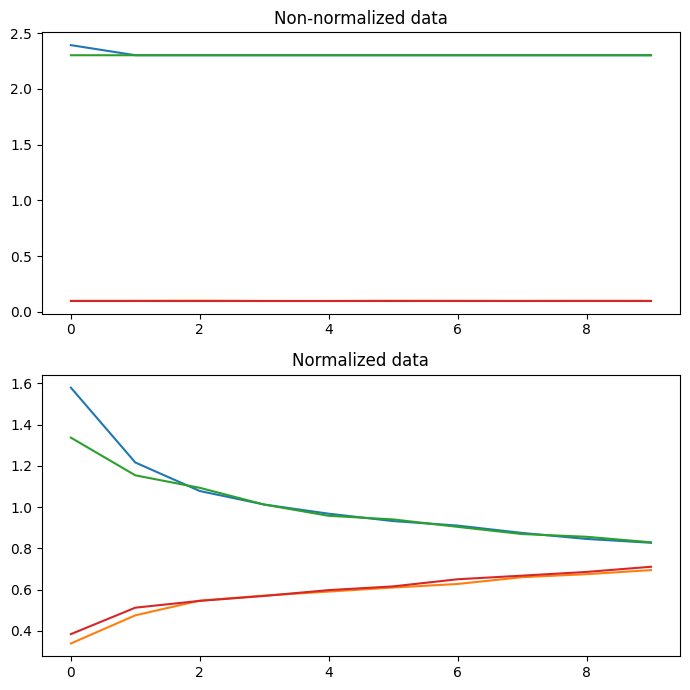

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
# Plot non-normalized data loss curves
axes[0].plot(pd.DataFrame(non_norm_history.history))
axes[0].set_title('Non-normalized data')
# Plot normalized data loss curves
axes[1].plot(pd.DataFrame(norm_history.history))
axes[1].set_title('Normalized data')

plt.tight_layout()
plt.show()

**Note:** The same model with even *sligthly* different data can produce *dramatically* different results. So when you're comparing models, it's importanto to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5431 - accuracy: 0.4076 - val_loss: 1.2660 - val_accuracy: 0.4863 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0440 - accuracy: 0.5788 - val_loss: 0.9378 - val_accuracy: 0.6051 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8147 - accuracy: 0.6742 - val_loss: 0.7777 - val_accuracy: 0.6932 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6949 - accuracy: 0.7466 - val_loss: 0.6902 - val_accuracy: 0.7601 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6185 - accuracy: 0.7930 - val_loss: 0.6168 - val_accuracy: 0.7950 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5703 - accuracy: 0.8054 - val_loss: 0.6164 - val_accuracy: 0.7811 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

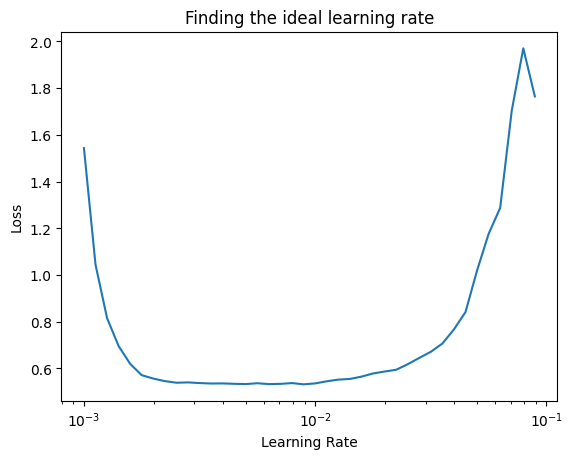

In [16]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate');

In [18]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0948 - accuracy: 0.6138 - val_loss: 0.7676 - val_accuracy: 0.7191
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7081 - accuracy: 0.7261 - val_loss: 0.6849 - val_accuracy: 0.7338
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7548 - val_loss: 0.6782 - val_accuracy: 0.7500
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6144 - accuracy: 0.7711 - val_loss: 0.6354 - val_accuracy: 0.7706
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5930 - accuracy: 0.7822 - val_loss: 0.6466 - val_accuracy: 0.7585
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7894 - val_loss: 0.6052 - val_accuracy: 0.7776
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5610 - accuracy: 0.7928 - val_loss: 0.6069 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [21]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [22]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for 'prediction probabilities'

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[4.3469645e-06, 1.2782763e-20, 1.5477264e-09, 3.2331766e-11,
        6.2114843e-19, 2.9437657e-02, 2.0270125e-08, 8.5546792e-02,
        6.5819826e-05, 8.8494539e-01],
       [1.7469203e-02, 1.5316356e-05, 6.6431302e-01, 1.4249536e-03,
        3.0263253e-02, 5.5247784e-04, 2.6071560e-01, 7.3768990e-03,
        1.4755600e-02, 3.1135958e-03],
       [1.3900661e-06, 9.9541867e-01, 1.1954897e-07, 4.4313516e-03,
        8.9340203e-05, 5.8172936e-05, 8.5166528e-07, 4.3769682e-10,
        1.3154826e-07, 1.1382658e-12],
       [6.6615641e-08, 9.9901628e-01, 1.5979889e-08, 7.4156729e-04,
        4.4473500e-06, 2.3740520e-04, 4.0613280e-08, 9.0868850e-09,
        7.9585064e-08, 1.6127783e-12],
       [1.0371149e-01, 1.1096218e-05, 2.9674724e-01, 1.0334122e-02,
        2.9903967e-02, 1.5425957e-04, 5.4706651e-01, 2.1109561e-05,
        1.2022758e-02, 2.7437382e-05]], dtype=float32)

In [27]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([4.3469645e-06, 1.2782763e-20, 1.5477264e-09, 3.2331766e-11,
        6.2114843e-19, 2.9437657e-02, 2.0270125e-08, 8.5546792e-02,
        6.5819826e-05, 8.8494539e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [28]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# Viwe the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7], dtype=int64)

In [29]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[686,   0,  22,  65,  15,   1, 204,   0,   7,   0],
       [  0, 933,   5,  27,  31,   0,   4,   0,   0,   0],
       [ 10,   1, 629,   5, 265,   0,  89,   0,   1,   0],
       [ 32,   9,  10, 791,  77,   0,  79,   0,   2,   0],
       [  0,   3, 105,  14, 854,   0,  24,   0,   0,   0],
       [  0,   0,   1,   0,   0, 875,   0,  72,   6,  46],
       [128,   1, 303,  29, 195,   0, 333,   0,  11,   0],
       [  0,   0,   0,   0,   0,  25,   0, 936,   0,  39],
       [  3,   0,  41,   5,   3,   3,  11,   7, 926,   1],
       [  1,   0,   1,   0,   0,   7,   0,  41,   4, 946]], dtype=int64)

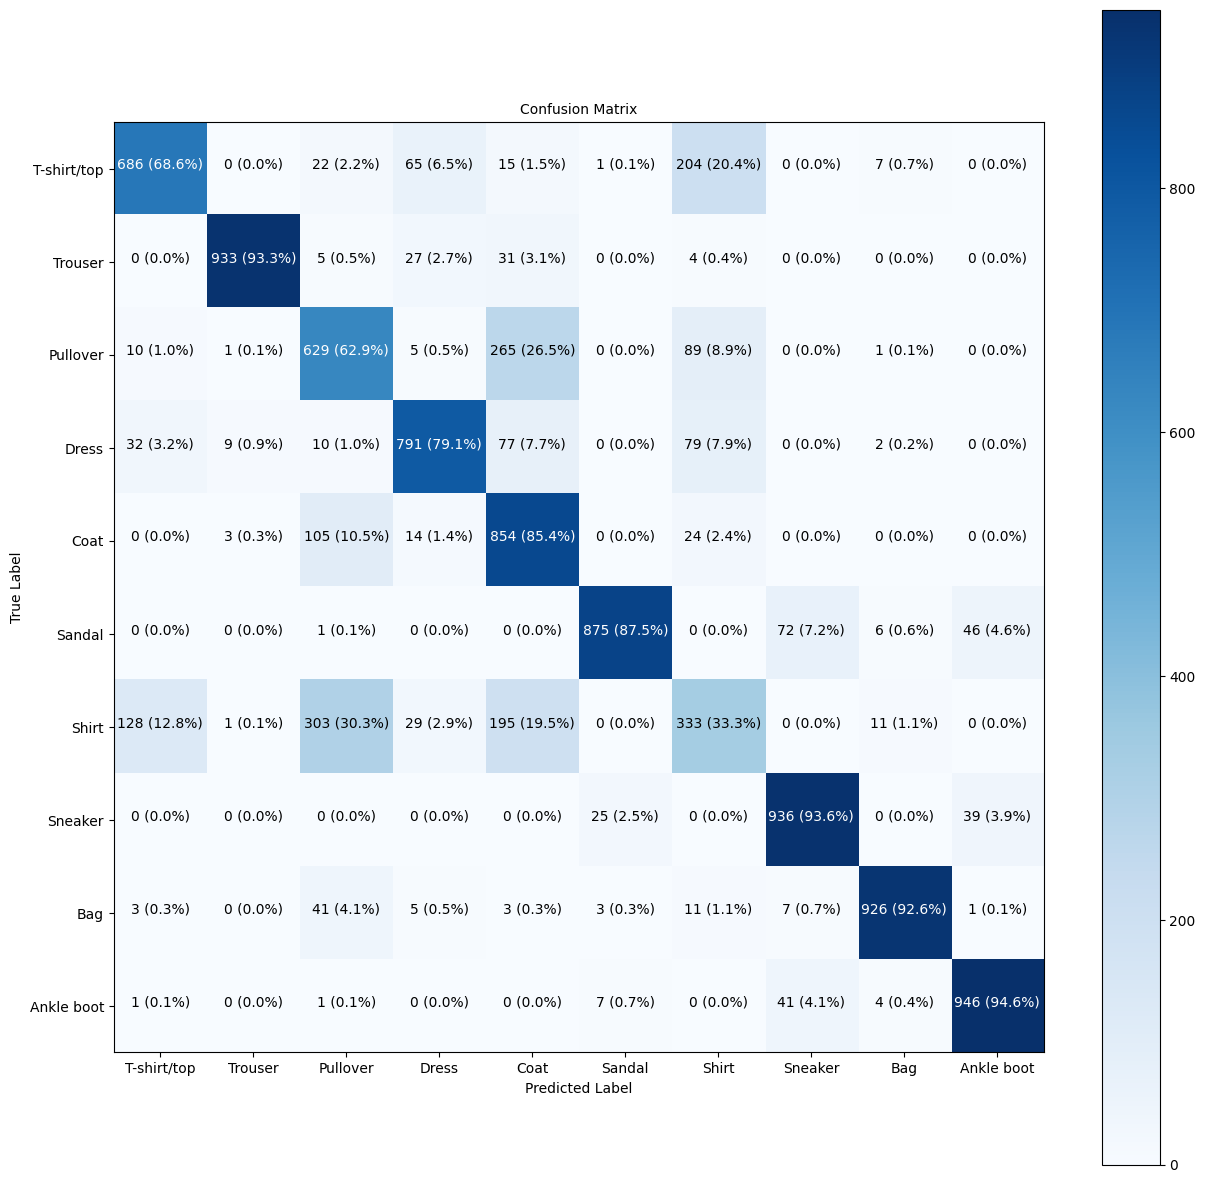

In [31]:
# Let's make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [34]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, pltos it and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
                        color=color) # set the color to green or redbased on if the prediction is right or wrong

1/1 [==============================] - 0s 13ms/step


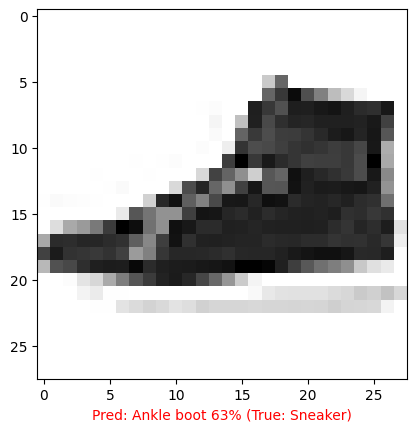

In [45]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data the model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [46]:
# Find the layers of our most recent model
model_14.layers

In [48]:
# Extract a particular layer
model_14.layers[1]

In [49]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# Shapes
weigths, weigths.shape

(array([[ 0.38548493, -0.37917733,  0.37905735, -0.32863638],
        [ 0.02635342, -0.06996106, -0.62404126, -0.19777624],
        [-0.08695601, -0.5229812 , -0.5492874 , -0.1384579 ],
        ...,
        [-0.41622496,  0.43732327, -0.48863497, -0.12058333],
        [-1.4362417 ,  0.01596176,  0.8789539 , -0.11527122],
        [-0.09657113, -0.718084  ,  0.09179913,  0.1043012 ]],
       dtype=float32),
 (784, 4))

In [50]:
28 * 28

784

In [51]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [52]:
784 * 4 + 4

3140

Now let's check out the bias vector...

In [53]:
# Bias and biases shapes
biases, biases.shape

(array([ 1.5896188 ,  1.2684166 , -1.1150281 , -0.85270643], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [54]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model # type: ignore
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
